In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import binom

from matplotlib import pyplot as plt

## Brief description of the dataset and a summary of its attributes
We import the dataset and explore its characteristics. The dataset contains one numerical variable and 8 objects, that are either strings or dates. The measurements are monthly measurements and the date column, holds the respective dates.

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104555 entries, 0 to 104554
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      104555 non-null  int64  
 1   date            104555 non-null  object 
 2   datatype        104555 non-null  object 
 3   station         104555 non-null  object 
 4   attributes      104525 non-null  object 
 5   value           104555 non-null  float64
 6   countryid       104555 non-null  object 
 7   id              104555 non-null  object 
 8   datacategoryid  104555 non-null  object 
 9   name            104555 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.0+ MB
None


The dataset includes 10 different features on temperature and precipitation.

In [4]:
print(df[['datacategoryid', 'id', 'name']].drop_duplicates(ignore_index=True))

   datacategoryid    id                                               name
0            COMP  CLDD                                Cooling Degree Days
1            COMP  DP01  Number of days with greater than or equal to 0...
2            COMP  DP10  Number of days with greater than or equal to 1...
3            COMP  DT00  Number days with minimum temperature less than...
4            COMP  DT32  Number days with minimum temperature less than...
5            COMP  DX32       Number days with maximum temperature < 32 F.
6            COMP  DX70  Number days with maximum temperature > 70 F (2...
7            COMP  DX90  Number days with maximum temperature > 90 F (3...
8            COMP  HTDD                                Heating degree days
9            PRCP  DSND  Number days with snow depth > 1 inch(25.4mm) f...
10           PRCP  EMSD         Extreme maximum snow depth for the period.
11           PRCP  EMXP      Extreme maximum precipitation for the period.
12           PRCP  PRCP  

In [5]:
print(min(df['date']))
print(max(df['date']))

2014-01-01T00:00:00
2023-07-01T00:00:00


The measurements cover the period of Jan. 2014 - June 2023.

## Initial plan for data exploration
We cast each feature to a numerical variable and we check the basic statistics of those variables.

In [6]:
df.pivot(index = ['date', 'station'], columns = 'id', values = 'value')

id                                      CDSD   CLDD  DP01  DP10  DSND  DT00  \
date                station                                                   
2014-01-01T00:00:00 GHCND:FG000081405    NaN    NaN  29.0  20.0   NaN   NaN   
                    GHCND:FGM00081401    NaN    NaN  22.0  14.0   NaN   0.0   
                    GHCND:FGM00081415    NaN    NaN  22.0  15.0   NaN   0.0   
                    GHCND:FP000091925    NaN    NaN  22.0   8.0   NaN   NaN   
                    GHCND:FP000091948    NaN    NaN  19.0  12.0   NaN   NaN   
...                                      ...    ...   ...   ...   ...   ...   
2023-07-01T00:00:00 GHCND:GRM00016622    NaN    NaN   3.0   1.0   NaN   NaN   
                    GHCND:GRM00016719  491.8  306.3   0.0   0.0   NaN   0.0   
                    GHCND:GRM00016726    NaN    NaN   0.0   0.0   NaN   NaN   
                    GHCND:MFM00067005    NaN    NaN   9.0   1.0   NaN   NaN   
                    GHCND:SBM00071805    NaN    NaN  26.0   5.0   NaN   NaN   

id                                     DT32  DX32  DX70  DX90  EMNT  EMSD  \
date                station                                                 
2014-01-01T00:00:00 GHCND:FG000081405   NaN   NaN   NaN   NaN   NaN   NaN   
                    GHCND:FGM00081401   0.0   NaN   NaN   NaN  19.7   NaN   
                    GHCND:FGM00081415   0.0   NaN   NaN   NaN  20.1   NaN   
                    GHCND:FP000091925   NaN   0.0  26.0   2.0   NaN   NaN   
                    GHCND:FP000091948   NaN   NaN   NaN   NaN   NaN   NaN   
...                                     ...   ...   ...   ...   ...   ...   
2023-07-01T00:00:00 GHCND:GRM00016622   NaN   NaN   NaN   NaN   NaN   NaN   
                    GHCND:GRM00016719   0.0   0.0  31.0  23.0  18.0   NaN   
                    GHCND:GRM00016726   NaN   NaN   NaN   NaN   NaN   NaN   
                    GHCND:MFM00067005   NaN   NaN   NaN   NaN   NaN   NaN   
                    GHCND:SBM00071805   NaN   NaN   NaN   NaN   NaN   NaN   

id                                     EMXP  EMXT  HDSD  HTDD   PRCP   TAVG  \
date                station                                                   
2014-01-01T00:00:00 GHCND:FG000081405  85.1   NaN   NaN   NaN  594.7    NaN   
                    GHCND:FGM00081401  35.1   NaN   NaN   NaN  233.7    NaN   
                    GHCND:FGM00081415  25.9   NaN   NaN   NaN  161.8    NaN   
                    GHCND:FP000091925  30.0  32.7   NaN   NaN   81.4    NaN   
                    GHCND:FP000091948  29.0   NaN   NaN   NaN  126.4    NaN   
...                                     ...   ...   ...   ...    ...    ...   
2023-07-01T00:00:00 GHCND:GRM00016622  15.5   NaN   NaN   NaN   16.1    NaN   
                    GHCND:GRM00016719   0.0  40.2   0.0   0.0    0.0  28.21   
                    GHCND:GRM00016726   0.0   NaN   NaN   NaN    0.0    NaN   
                    GHCND:MFM00067005   4.1   NaN   NaN   NaN    7.1    NaN   
                    GHCND:SBM00071805  31.8   NaN   NaN   NaN  130.4    NaN   

id                                      TMAX   TMIN  
date                station                          
2014-01-01T00:00:00 GHCND:FG000081405    NaN    NaN  
                    GHCND:FGM00081401    NaN  22.02  
                    GHCND:FGM00081415    NaN  22.32  
                    GHCND:FP000091925  30.73    NaN  
                    GHCND:FP000091948    NaN    NaN  
...                                      ...    ...  
2023-07-01T00:00:00 GHCND:GRM00016622    NaN    NaN  
                    GHCND:GRM00016719  35.14  21.28  
                    GHCND:GRM00016726    NaN    NaN  
                    GHCND:MFM00067005    NaN    NaN  
                    GHCND:SBM00071805    NaN    NaN  

[9858 rows x 20 columns]

In [7]:
df_summary = df.groupby(['countryid', 'name', 'id'])['value'].agg([np.mean, np.median, np.std, min, max, lambda x : np.quantile(x, 0.25), 
                                                                   lambda x : np.quantile(x, 0.75), lambda x: x.count()])\
    .rename(columns = {"<lambda_0>":"25 percentile", "<lambda_1>":"75 percentile", "<lambda_2>":"Count"})

print(df_summary)

                                                                         mean  \
countryid name                                               id                 
FIPS:FR   Average Temperature.                               TAVG   13.655075   
          Cooling Degree Days                                CLDD   28.527508   
          Cooling Degree Days Season to Date                 CDSD  147.630388   
          Extreme maximum precipitation for the period.      EMXP   20.345910   
          Extreme maximum snow depth for the period.         EMSD  214.636364   
          Extreme maximum temperature for the period.        EMXT   25.009205   
          Extreme minimum temperature for the period.        EMNT    3.762301   
          Heating Degree Days Season to Date                 HDSD  960.460878   
          Heating degree days                                HTDD  165.409756   
          Maximum temperature                                TMAX   18.362302   
          Minimum temperatur

## Data cleaning and feature engineering
we explore the dataset in its initial form, looking for outliers. We also simplify by removing the stations feature. Finally we explore the distribution of variables and look for the need of transformations or scaling. We do not need to deal with categorical variables. We only have numerical variables.

We get the interquartile range, and look for outliers.

In [8]:
df_summary['iqr'] = df_summary['75 percentile'] - df_summary['25 percentile']

In [9]:
df_summary['upper_limit'] = df_summary['75 percentile'] + 1.5 * df_summary['iqr']
df_summary['lower_limit'] = df_summary['25 percentile'] - 1.5 * df_summary['iqr']

In [10]:
display(df_summary[['upper_limit', 'lower_limit']])

upper_limit  \
countryid name                                               id                  
FIPS:FR   Average Temperature.                               TAVG     32.72500   
          Cooling Degree Days                                CLDD     86.75000   
          Cooling Degree Days Season to Date                 CDSD    605.00000   
          Extreme maximum precipitation for the period.      EMXP     46.15000   
          Extreme maximum snow depth for the period.         EMSD    410.00000   
          Extreme maximum temperature for the period.        EMXT     50.15000   
          Extreme minimum temperature for the period.        EMNT     22.95000   
          Heating Degree Days Season to Date                 HDSD   4180.87500   
          Heating degree days                                HTDD    648.15000   
          Maximum temperature                                TMAX     40.67000   
          Minimum temperature                                TMIN     26.91000   
          Number days with maximum temperature < 32 F.       DX32      0.00000   
          Number days with maximum temperature > 70 F (21... DX70     57.50000   
          Number days with maximum temperature > 90 F (32... DX90      0.00000   
          Number days with minimum temperature less than ... DT00      0.00000   
          Number days with minimum temperature less than ... DT32      5.00000   
          Number days with snow depth > 1 inch(25.4mm) fo... DSND     43.00000   
          Number of days with greater than or equal to 0.... DP01     30.50000   
          Number of days with greater than or equal to 1.... DP10     15.50000   
          Precipitation                                      PRCP    171.10000   
FIPS:GR   Average Temperature.                               TAVG     41.35375   
          Cooling Degree Days                                CLDD    515.47500   
          Cooling Degree Days Season to Date                 CDSD   1632.68750   
          Extreme maximum precipitation for the period.      EMXP     62.35000   
          Extreme maximum temperature for the period.        EMXT     53.83750   
          Extreme minimum temperature for the period.        EMNT     31.93750   
          Heating Degree Days Season to Date                 HDSD    114.87500   
          Heating degree days                                HTDD    195.75000   
          Maximum temperature                                TMAX     47.28625   
          Minimum temperature                                TMIN     35.01875   
          Number days with maximum temperature < 32 F.       DX32      0.00000   
          Number days with maximum temperature > 70 F (21... DX70     69.50000   
          Number days with maximum temperature > 90 F (32... DX90     10.00000   
          Number days with minimum temperature less than ... DT00      0.00000   
          Number days with minimum temperature less than ... DT32      0.00000   
          Number of days with greater than or equal to 0.... DP01     19.50000   
          Number of days with greater than or equal to 1.... DP10     11.00000   
          Precipitation                                      PRCP    154.65000   

                                                                   lower_limit  
countryid name                                               id                 
FIPS:FR   Average Temperature.                               TAVG     -5.35500  
          Cooling Degree Days                                CLDD    -52.05000  
          Cooling Degree Days Season to Date                 CDSD   -363.00000  
          Extreme maximum precipitation for the period.      EMXP    -11.85000  
          Extreme maximum snow depth for the period.         EMSD     -6.00000  
          Extreme maximum temperature for the period.        EMXT      0.15000  
          Extreme minimum temperature for the period.        EMNT    -15.85000  
          Heating Degree Days Season to Date             

In [11]:
# Just some cleaning of the main table
df.reset_index()
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
df = df.merge(df_summary[['upper_limit', 'lower_limit']], on = ['countryid', 'id'], how = "left")

In [13]:
# Check for outliers
outliers = df[(df['value']>df['upper_limit'])|(df['value']<df['lower_limit'])]

In [14]:
outliers.shape

(4199, 11)

We find that approx. 1000 rows in 50000 rows of dataset are extreme values, which is around 2%. Since there are several extreme values, we are going to keep them.

In [15]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            104545, 104546, 104547, 104548, 104549, 104550, 104551, 104552,
            104553, 104554],
           dtype='int64', length=104555)

In [16]:
display(df)

date datatype            station attributes  value  \
0       2014-01-01T00:00:00     CLDD  GHCND:FR000007130         ,E   0.00   
1       2014-01-01T00:00:00     CLDD  GHCND:FR000007190         ,E   0.00   
2       2014-01-01T00:00:00     CLDD  GHCND:FR000007255         ,E   0.00   
3       2014-01-01T00:00:00     CLDD  GHCND:FR000007510        2,E   0.00   
4       2014-01-01T00:00:00     CLDD  GHCND:FR000007630        2,E   0.00   
...                     ...      ...                ...        ...    ...   
104550  2023-05-01T00:00:00     TMIN  GHCND:GRM00016719       ,,,S  13.85   
104551  2023-06-01T00:00:00     TMIN  GHCND:GR000016716      4,,,S  20.85   
104552  2023-06-01T00:00:00     TMIN  GHCND:GR000016734      1,,,S  18.40   
104553  2023-06-01T00:00:00     TMIN  GHCND:GRM00016719       ,,,S  17.83   
104554  2023-07-01T00:00:00     TMIN  GHCND:GRM00016719       ,,,S  21.28   

       countryid    id datacategoryid                 name  upper_limit  \
0        FIPS:FR  CLDD           COMP  Cooling Degree Days     86.75000   
1        FIPS:FR  CLDD           COMP  Cooling Degree Days     86.75000   
2        FIPS:FR  CLDD           COMP  Cooling Degree Days     86.75000   
3        FIPS:FR  CLDD           COMP  Cooling Degree Days     86.75000   
4        FIPS:FR  CLDD           COMP  Cooling Degree Days     86.75000   
...          ...   ...            ...                  ...          ...   
104550   FIPS:GR  TMIN           TEMP  Minimum temperature     35.01875   
104551   FIPS:GR  TMIN           TEMP  Minimum temperature     35.01875   
104552   FIPS:GR  TMIN           TEMP  Minimum temperature     35.01875   
104553   FIPS:GR  TMIN           TEMP  Minimum temperature     35.01875   
104554   FIPS:GR  TMIN           TEMP  Minimum temperature     35.01875   

        lower_limit  
0         -52.05000  
1         -52.05000  
2         -52.05000  
3         -52.05000  
4         -52.05000  
...             ...  
104550     -2.75125  
104551     -2.75125  
104552     -2.75125  
104553     -2.75125  
104554     -2.75125  

[104555 rows x 11 columns]

For each day, we can have measurements taken at several stations. We can summarize those measurements and reduce the size of the dataset.

In [17]:
df_mean = df.groupby(['countryid', 'datacategoryid', 'datatype', 'name', 'date'])[['value']].agg(["mean", "median"])

In [18]:
display(df_mean)

value  \
                                                                                mean   
countryid datacategoryid datatype name                date                             
FIPS:FR   COMP           CLDD     Cooling Degree Days 2014-01-01T00:00:00   0.000000   
                                                      2014-02-01T00:00:00   0.000000   
                                                      2014-03-01T00:00:00   0.046809   
                                                      2014-04-01T00:00:00   5.274468   
                                                      2014-05-01T00:00:00   2.761364   
...                                                                              ...   
FIPS:GR   TEMP           TMIN     Minimum temperature 2023-03-01T00:00:00   8.010000   
                                                      2023-04-01T00:00:00  10.546667   
                                                      2023-05-01T00:00:00  13.850000   
                                                      2023-06-01T00:00:00  19.026667   
                                                      2023-07-01T00:00:00  21.280000   

                                                                                  
                                                                          median  
countryid datacategoryid datatype name                date                        
FIPS:FR   COMP           CLDD     Cooling Degree Days 2014-01-01T00:00:00   0.00  
                                                      2014-02-01T00:00:00   0.00  
                                                      2014-03-01T00:00:00   0.00  
                                                      2014-04-01T00:00:00   0.00  
                                                      2014-05-01T00:00:00   0.70  
...                                                                          ...  
FIPS:GR   TEMP           TMIN     Minimum temperature 2023-03-01T00:00:00   8.01  
                                                      2023-04-01T00:00:00   9.98  
                                                      2023-05-01T00:00:00  13.85  
                                                      2023-06-01T00:00:00  18.40  
                                                      2023-07-01T00:00:00  21.28  

[3767 rows x 2 columns]

In [19]:
df_mean.columns = ['_'.join(col) for col in df_mean.columns.values]

In [20]:
df_mean.columns.values

array(['value_mean', 'value_median'], dtype=object)

In [21]:
df_mean[['value_mean']].isna().sum() # No missing values here

value_mean    0
dtype: int64

In [22]:
df_mean_wide = df_mean.reset_index(['datatype', 'datacategoryid', 'name']).pivot(columns = 'datatype', values = 'value_mean')

In [23]:
df_mean_wide.isna().sum()

datatype
CDSD    106
CLDD     34
DP01      0
DP10      0
DSND    219
DT00     19
DT32     19
DX32      6
DX70      6
DX90      6
EMNT     19
EMSD    219
EMXP      0
EMXT      6
HDSD     88
HTDD     34
PRCP      0
TAVG     27
TMAX      6
TMIN     19
dtype: int64

After transforming to a wide form, we see that missing values appear in the e.g. temperature measurements, but not in the e.g. precipitation.

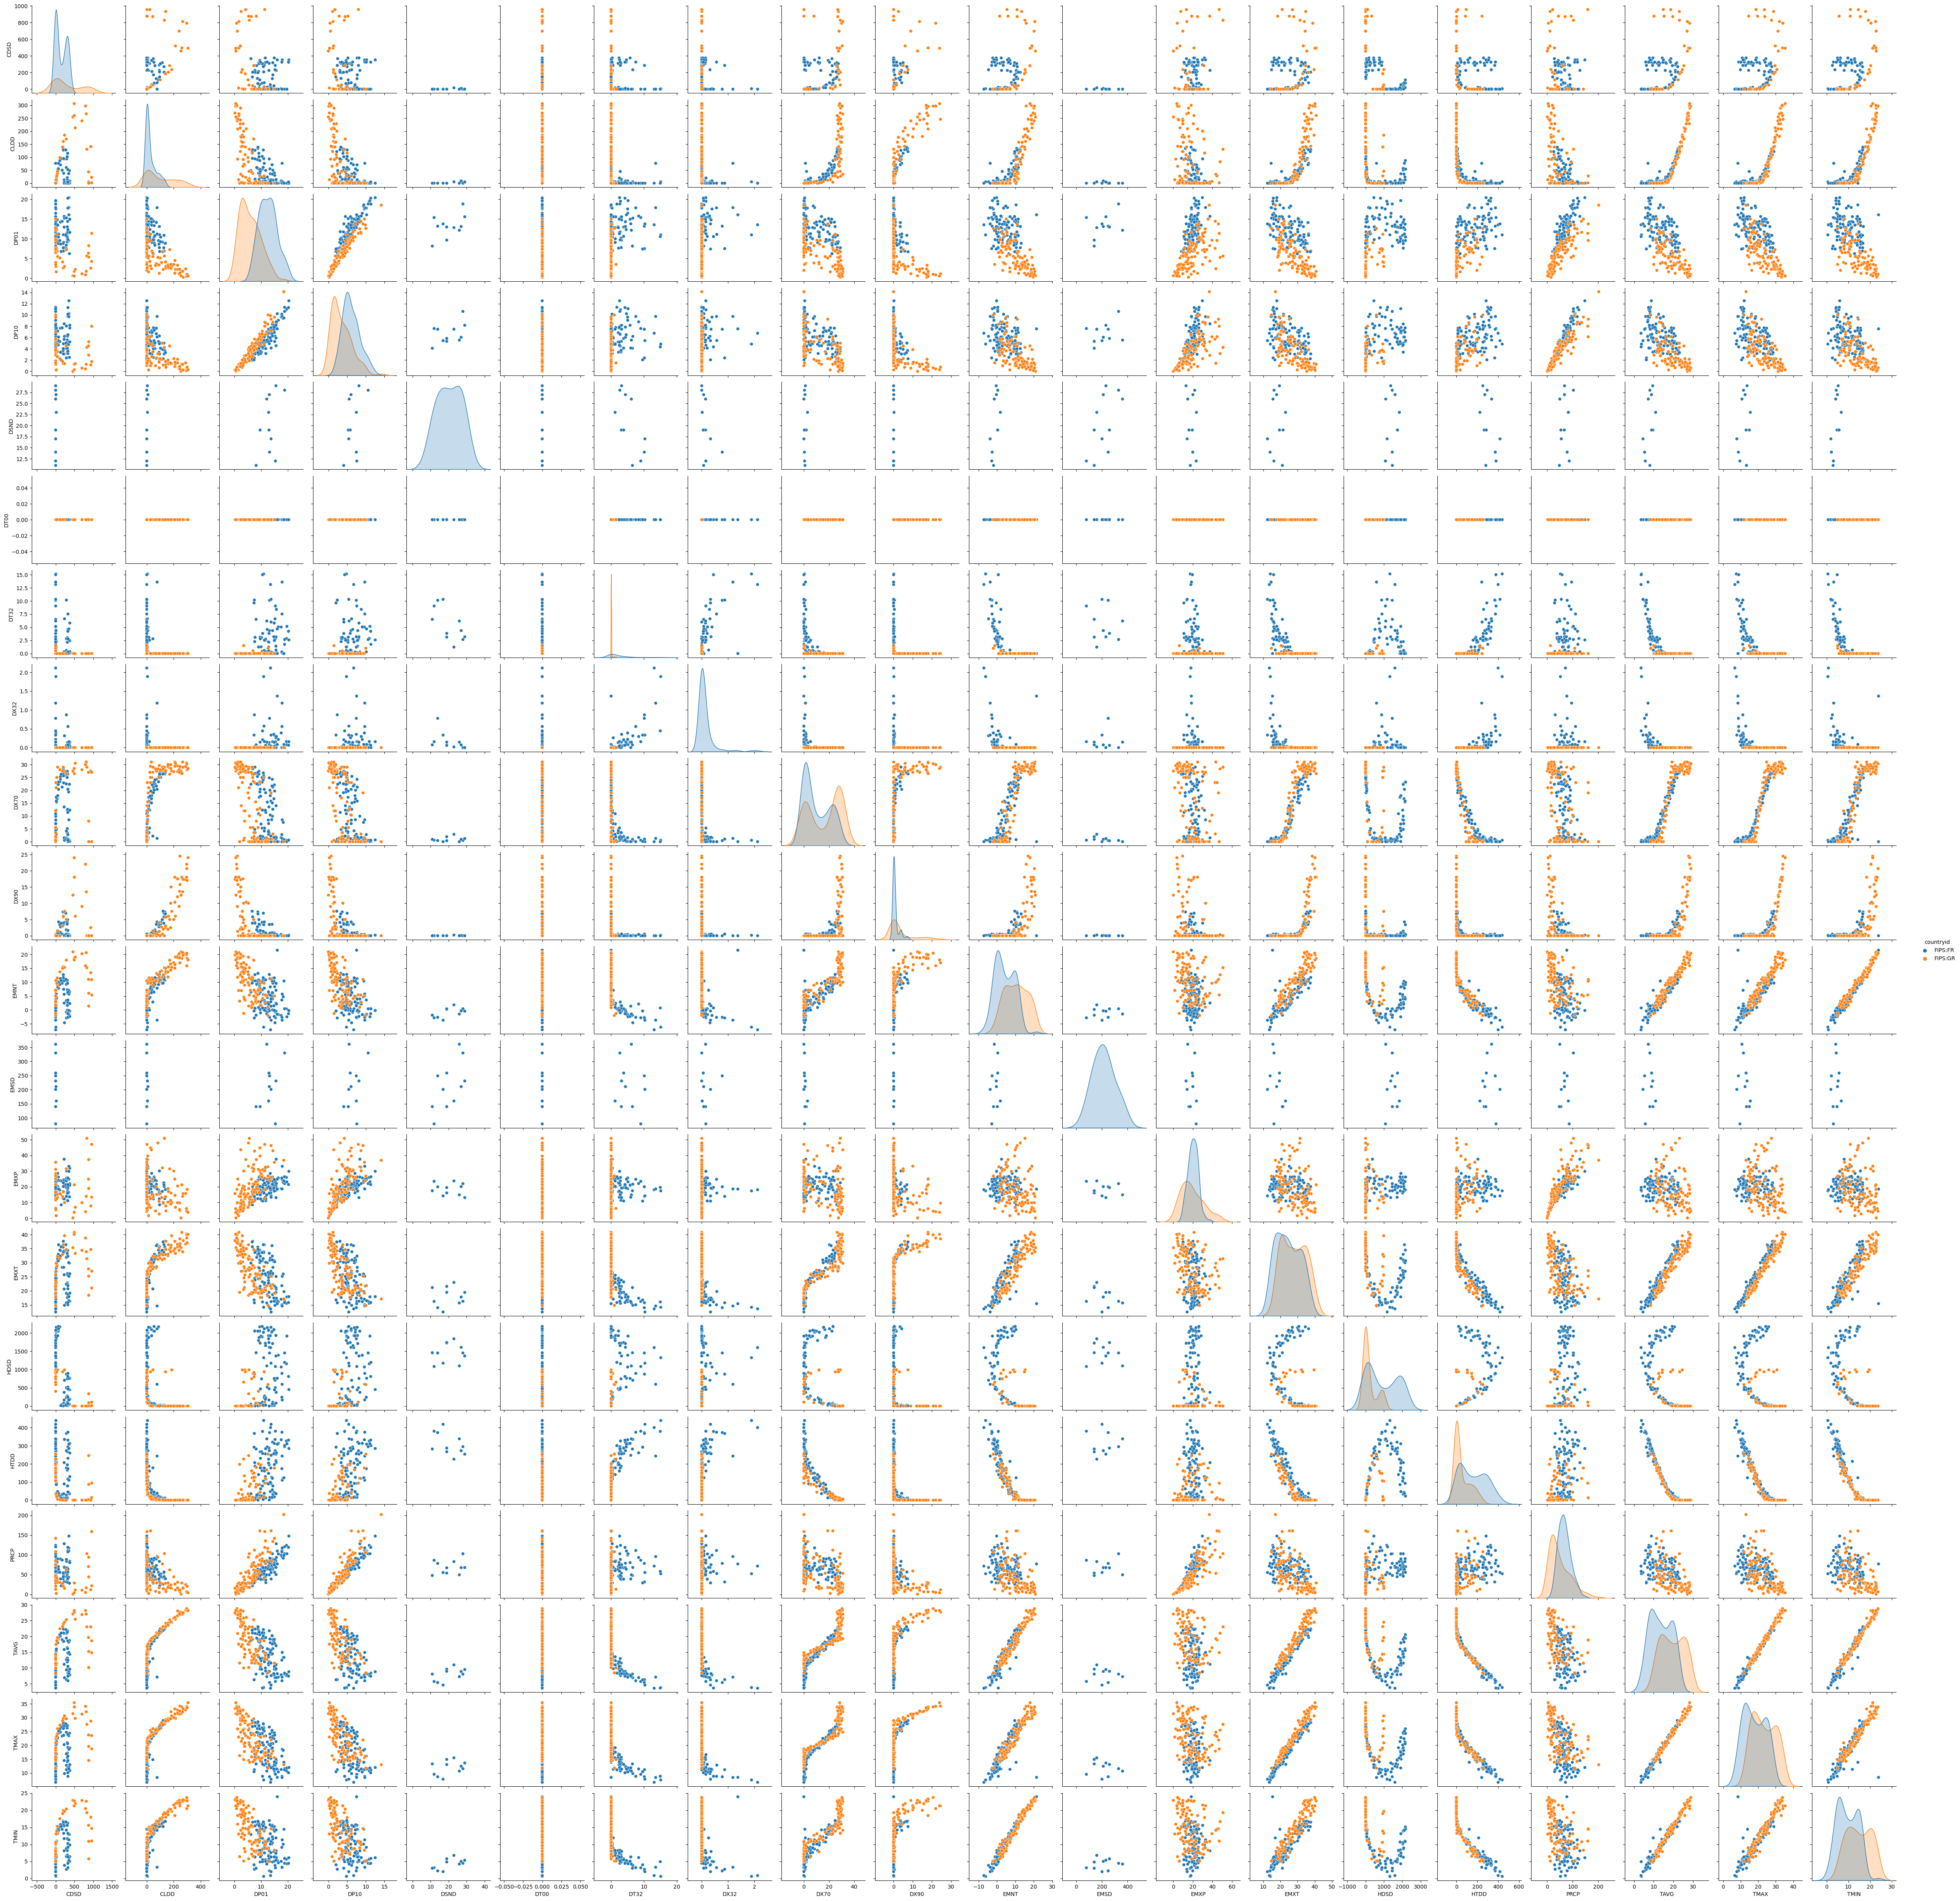

In [24]:
sns.pairplot(df_mean_wide.reset_index(), hue = 'countryid')

We check for skewed measurements in the combinations of datatype and countryid columns.

In [25]:
df_mean_skew = df_mean_wide.groupby('countryid').skew().reset_index().melt(id_vars = 'countryid')

In [26]:
df_mean_skew = df_mean_skew.set_index(['datatype', 'countryid'])
skew_cols = df_mean_skew[abs(df_mean_skew['value'])>0.75]

In [27]:
skew_cols

value
datatype countryid          
CLDD     FIPS:FR    1.364549
DP10     FIPS:GR    1.094458
DT32     FIPS:FR    1.940166
         FIPS:GR    6.650649
DX32     FIPS:FR    4.107611
DX90     FIPS:FR    2.276152
         FIPS:GR    1.750131
HDSD     FIPS:GR    1.329564
HTDD     FIPS:GR    1.208051
PRCP     FIPS:GR    1.201106

For the variables that we transformed, compare before and after the transformation.

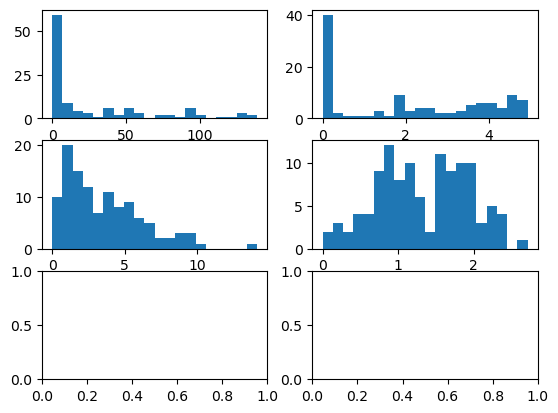

In [28]:
fig, ax = plt.subplots(3,2)
[ax[i,0].hist(df_mean_wide.loc[skew_cols.index.values[i][1], skew_cols.index.values[i][0]], bins = 20) for i in range(2)]
[ax[i,1].hist(df_mean_wide.loc[skew_cols.index.values[i][1], skew_cols.index.values[i][0]].apply(np.log1p), bins = 20) for i in range(2)]
plt.show()

In [29]:
# Apply the log transformation to the dataframe if we want
logTransform = False
if (logTransform == True) :
     for variable, country in skew_cols.index.values:
          df_mean_wide.loc[country, variable] = df_mean_wide.loc[country, variable].apply(np.log1p)


In [30]:
# Check that there is no skeweness in the transformed variables
df_mean_skew = df_mean_wide.groupby('countryid').skew().reset_index().melt(id_vars = 'countryid')
df_mean_skew = df_mean_skew.set_index(['datatype', 'countryid'])
skew_cols = df_mean_skew[abs(df_mean_skew['value'])>0.75]
[print(variable + country) for variable, country in skew_cols.index]

CLDDFIPS:FR
DP10FIPS:GR
DT32FIPS:FR
DT32FIPS:GR
DX32FIPS:FR
DX90FIPS:FR
DX90FIPS:GR
HDSDFIPS:GR
HTDDFIPS:GR
PRCPFIPS:GR


[None, None, None, None, None, None, None, None, None, None]

In [40]:
# Export the dataset with the aggregated values for further modeling
df_mean.reset_index().to_csv('mean_data.csv')

## Key findings and insights

Observations:

* Min, max and average temperatures, they follow linear relations one with each other.
* Temperatures follow a quadratic relation with heating/cooling degrees days. Cooling degrees days tends to increase with temperature, but there seems to be a threshold of days where it starts decreasing. It probably means that looking at large number of HDD, because it is cumulative it occurs at season with low temperatures. Similarly for heating degrees days, which is the demand of energy to heat a building, we see that HDD inrease as temperatures decrease, it reaches a minimum and then it is increasing also as temperatures increase. 
* looking at the relation between temperature and precipitation, it is not clear whether there is correlation between the two variables. Maybe further transformations can help to further understand the relation.

## Hypothesis testing

Hypothesis:

* There is no correlation between temperature and precipitation.
* Greece and France have similar behaviour on temperature. When the average temperature in Greece increases, also the same happens in France.
* Greece and France have similar behaviour on precipitation. When the precipitation in Greece increases, also the same happens in France.

### 1st hypothesis

* Null hypothesis: The correlation between temperature and precipitation is zero.
* Alternative hypothesis: The correlation between temperature and precipitation is different than zero.

To answer the question we need the true rate of the correlation coefficient. We take let's say 100 samples of measurements and calculate the probability that there is no correlation. We define as zero correlation when the correlation coefficient is in the interval [-0.1,0.1]

In [41]:
# Look for missing values in temperature and precipitation 
df_mean_wide[['PRCP', 'TAVG']].isna().sum()

datatype
PRCP     0
TAVG    27
dtype: int64

In [42]:
# Remove the missing values in temperature and precipitation
df_T_PRCP = df_mean_wide[(pd.isna(df_mean_wide['PRCP']) == False)&(pd.isna(df_mean_wide['TAVG']) == False)]
print(df_T_PRCP[['PRCP', 'TAVG']].isna().sum()) # check

datatype
PRCP    0
TAVG    0
dtype: int64


In [43]:
df_T_PRCP = df_T_PRCP[['PRCP', 'TAVG']]

# Take 1000 samples of 50 measurements and calculate the pearson correlation coefficient without replacement
dt_corrcoef = pd.DataFrame()

for i in range(1000):
    corrcoef_sample = stats.pearsonr(x = np.array(df_T_PRCP.sample(50, replace = True)).T[0], y = np.array(df_T_PRCP.sample(50, replace = True)).T[1]).correlation
    corrcoef_dt = pd.DataFrame([{'Sample':i, 'CorrCoef': corrcoef_sample}])
    dt_corrcoef = pd.concat([dt_corrcoef, corrcoef_dt], axis = 0)

In [44]:
#Calculate the probability of zero correlation in the samples
proba = dt_corrcoef[(dt_corrcoef['CorrCoef']<=0.1)&(dt_corrcoef['CorrCoef']>=-0.1)].shape[0]/1000
print(proba)

0.507


In [45]:
# We know the probability of getting zero correlation. And so we calculate the probability of getting the alternative hypothesis using the binomial distribution. 
prob1 = 1-binom.cdf(60, 100, (1-proba))
print("Out of 100 samples, the probability to have correlation in more than 60 of those is "+str(round(prob1*100, 1))+"%")

Out of 100 samples, the probability to have correlation in more than 60 of those is 1.2%


In [46]:
print("Out of 100 samples we have correlation in at least "+ str(binom.ppf(0.95,100,1-proba)+1)+" samples with confidence level 95%.")

Out of 100 samples we have correlation in at least 59.0 samples with confidence level 95%.


Therefore there is some form of correlation present and it is rather improbable that we have zero correlation.

### 2nd hypothesis

Greece and France have different temperatures.

* Null hypothesis: The temperatures in Greece and in France are the same.
* Alternative hyppothesis: The temperatures in Greece and in France are different.

We choose 5% significance level.

In [47]:
df_T = df_mean_wide[(pd.isna(df_mean_wide['TAVG']) == False)]
df_T = df_T.reset_index()
df_T = df_T[['countryid','TAVG']]
print(df_T)

datatype countryid       TAVG
0          FIPS:FR   7.576977
1          FIPS:FR   8.031957
2          FIPS:FR   9.610000
3          FIPS:FR  13.044894
4          FIPS:FR  14.306889
..             ...        ...
198        FIPS:GR  12.990000
199        FIPS:GR  14.340000
200        FIPS:GR  18.610000
201        FIPS:GR  23.115000
202        FIPS:GR  28.210000

[203 rows x 2 columns]


In [48]:
france=df_T.loc[df_T['countryid']=="FIPS:FR", 'TAVG']
greece=df_T.loc[df_T['countryid']=="FIPS:GR", 'TAVG']


C:\Users\tzava\AppData\Local\Temp\ipykernel_19064\2272142649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(france,color='green',hist=False)
C:\Users\tzava\AppData\Local\Temp\ipykernel_19064\2272142649.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(greece,color='red',

<Axes: xlabel='TAVG', ylabel='Density'>

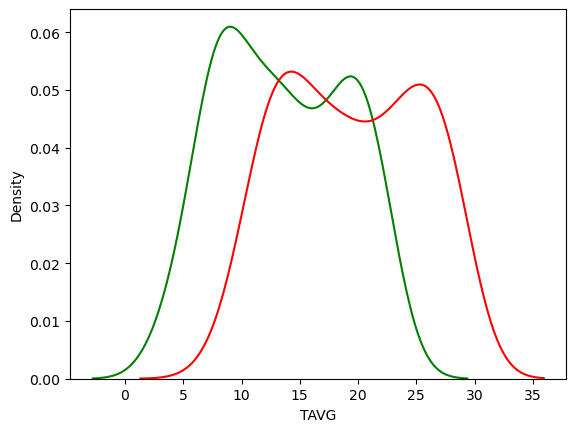

In [49]:
sns.distplot(france,color='green',hist=False)
sns.distplot(greece,color='red',hist=False)

From the density plots we observe that the distribution of the temperatures in Greece and in France are similar but there is a shift between them, showing that Greece has higher temperatures than France. Also we observe that in both countries the most common temperatures are towards the edges of the distribution rather than in the middle.

In [50]:
print(france.mean())
print(greece.mean())

13.574223251555756
19.509425925925925


We see that the mean temperature in Greece is higher than the mean temperature in France.

In [51]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(france, greece)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -7.484791193720378 , p_value1 =  2.1999515769113016e-12


In [52]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between the temperatures in Greece and France.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is no difference between the temperatures in Greece and in France.")

Conclusion: since p_value 2.1999515769113016e-12 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between the temperatures in Greece and France.


### 3rd hypothesis

Greece and France have different precipitation levels.

* Null hypothesis: The precipitation in Greece and in France is the same.
* Alternative hyppothesis: The precipitation in Greece and in France is different.

We choose 5% significance level.

In [139]:
df_PRCP = df_mean_wide[(pd.isna(df_mean_wide['PRCP']) == False)]
df_PRCP = df_PRCP.reset_index()
df_PRCP = df_PRCP[['countryid','PRCP']]
print(df_PRCP)

datatype countryid        PRCP
0          FIPS:FR  124.025301
1          FIPS:FR  102.704938
2          FIPS:FR   53.793750
3          FIPS:FR   49.677778
4          FIPS:FR   78.538272
..             ...         ...
223        FIPS:GR   12.775000
224        FIPS:GR   40.787500
225        FIPS:GR   45.712500
226        FIPS:GR   41.385714
227        FIPS:GR   27.900000

[228 rows x 2 columns]


In [140]:
france_PRCP=df_PRCP.loc[df_PRCP['countryid']=="FIPS:FR", 'PRCP']
greece_PRCP=df_PRCP.loc[df_PRCP['countryid']=="FIPS:GR", 'PRCP']


C:\Users\tzava\AppData\Local\Temp\ipykernel_10188\2817746939.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(france_PRCP,color='green',hist=False)
C:\Users\tzava\AppData\Local\Temp\ipykernel_10188\2817746939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(greece_PRCP,co

<Axes: xlabel='PRCP', ylabel='Density'>

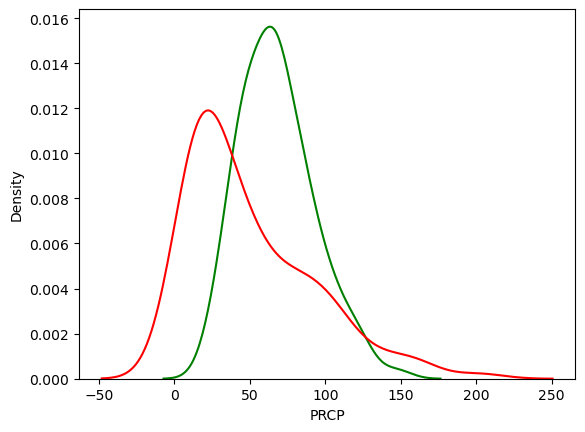

In [141]:
sns.distplot(france_PRCP,color='green',hist=False)
sns.distplot(greece_PRCP,color='red',hist=False)

In [142]:
print(france_PRCP.mean())
print(greece_PRCP.mean())

67.92803348086044
50.262224310776936


In [143]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(france_PRCP, greece_PRCP)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  3.886752810839097 , p_value1 =  0.0001335345719358334


In [144]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between the precipitation in Greece and France.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is no difference between the precipitation in Greece and in France.")

Conclusion: since p_value 0.0001335345719358334 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between the precipitation in Greece and France.
